# Глубокое обучение. Свёрточные нейронные сети (CNN)

## Какое обучение называют глубоким

**Глубокое обучение** — это подход к машинному обучению, в котором модель строится как **последовательность** нелинейных преобразований, каждый из которых извлекает признаки всё более высокого уровня абстракции. Например, от отдельных контуров на изображении до целых фигур и силуэтов.

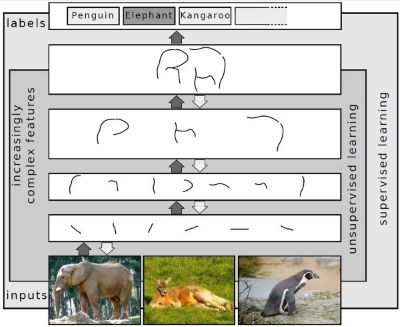

Под **глубиной** сети понимают число слоёв в сети, то есть уровней абстракции, которые сеть может обрабатывать.

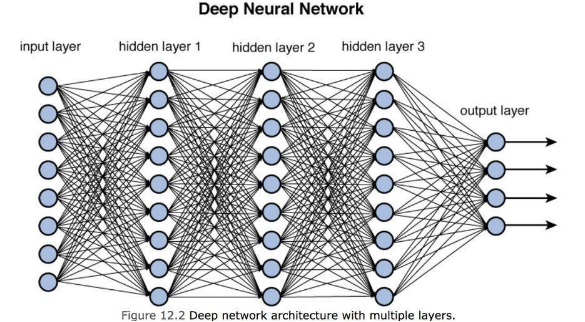

## Обработка изображений. Ограничения MLP

**Изображение** обычно представлено трёхмерным тензором размерности $H \times W \times C$, где $H$ — высота, $W$ — ширина, $C$ — число каналов. Обычно $C=3$ для `RGB`. Почти всегда интенсивности пикселей нормируют в диапазон $[0,1]$ или $[0,255]$ в целочисленном представлении.

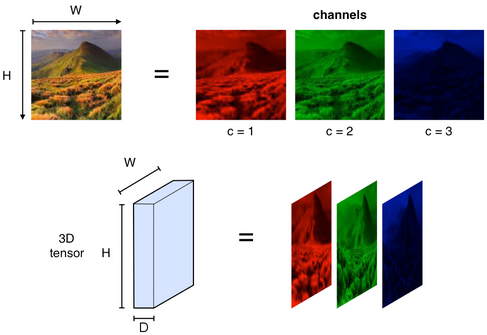

Если изображение из $3D$ развернуть в последовательную цепочку значений, применить многослойный перцептрон $MLP$, выделив на каждый пиксель хотя бы один нейрон, то число **параметров** входного слоя будет порядка:

$$\text{params} \sim H \cdot W \cdot C \cdot C_\text{out},$$

где $C_\text{out}$ — число нейронов первого скрытого слоя. Например, для изображения $224 \times 224 \times 3$ и нейросети без скрытых слоёв, возвращающей одно значение, мы получим $150528$ нейронов. Это вычислительно сложно.

Более того, `MLP` не учитывает **связь** между соседними **пикселями**, будет давать разные результаты в зависимости от ориентации изображения, что значительно ограничивает применение классической архитектуры к обработке последовательных данных.


## Решение проблемы. Свёртки

**Свёртка** ($convolution$) — это операция, которая локально применяет один и тот же небольшой **фильтр** (ядро, $kernel$) ко всем позициям изображения. Ядро обычно представляет собой квадрат $k\times k$. Для **простоты** будем считать, что в изображении **один канал**, то есть это $2D$-таблица.

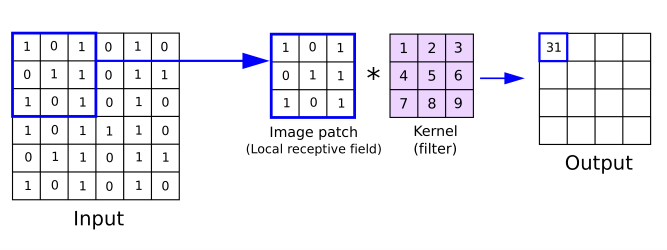

Свёртка представляет собой небольшую **таблицу** из чисел, на которые умножаются значения пикселей изображения, а затем все эти произведения складываются для получения одного нового числа.

Можно сказать, что свёртка решает задачу **линейной регрессии** локально в разных регионах изображения. Действительно, обозначим $i$-е по горизонтали и $j$-е по вертикали число в свёртке как $w_{ij}$, аналогично для рассматриваемого участка изображения пиксель $x_{ij}$. Будем считать, что имеется сдвиг $b$. Тогда итоговый результат:

$$f(x) = \sum_{j=1}^k \sum_{i=1}^k  w_{ij}x_{ij} + b$$

Тогда задача обучения **свёрточной нейронной сети** $(Convolutional\ Neural\ Network,\ CNN)$ сводится к поиску весов $w_{ij}$, то есть подходящих значений ядер.

После операции свёртки значение $f(x)$ передаётся в **функцию активации**, обычно это `ReLU` или `GELU`:

$$result=activation[f(x)]$$

##Примеры свёрток

**Свёртки** можно задавать **вручную**. Рассмотрим ряд классических примеров для свёрток с ядром $3 \times 3$. Приведённые ниже фильтры были выведены учёными разного времени, такие ядра позволяют выделять границы или применять эффект размытия к изображению.

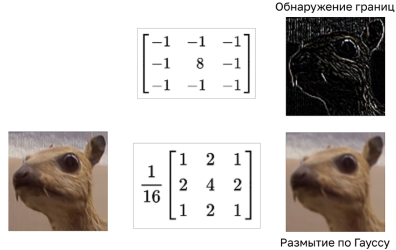

Свёртки, называемые **фильтром Собеля**, являются классическим методом детекции вертикальных и горизонтальных **границ**. Они показывают изменение структуры изображения в заданном направлении, определяемом знаком перед значениями в ядре.

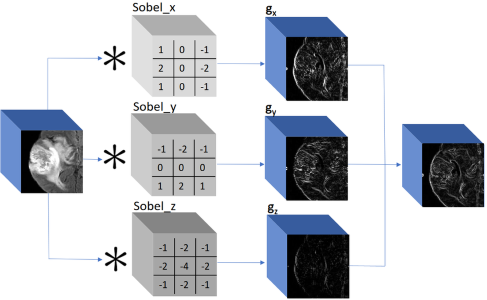

##Многоканальное изображение

В случае наличия **нескольких каналов** в изображении, например при цветовой модели `RGB`, достаточно применять свёртки к каждому из каналов в отдельности.

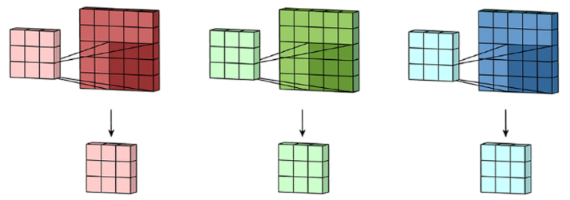

С последующим **комбинированием** результатов в один тензор.

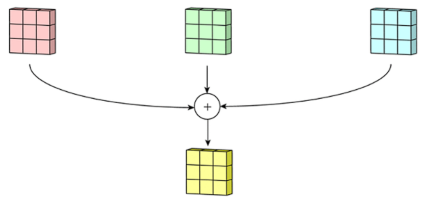

##Рециптивное поле

**Рециптивное поле** $(receptive\ field)$ — это область входного изображения, которая влияет на выход нейронов в слое сети. Определяет, сколько пикселей изображения участвует в вычислении значения для конкретного нейрона.

Размер рециптивного поля определяет, насколько широкий **контекст** способна охватить свёртка данного слоя. Свёртки более низких слоёв отвечают за обработку низкоуровневых паттернов, а более высоких позволяют работать с обощёнными представлениями вроде формы.

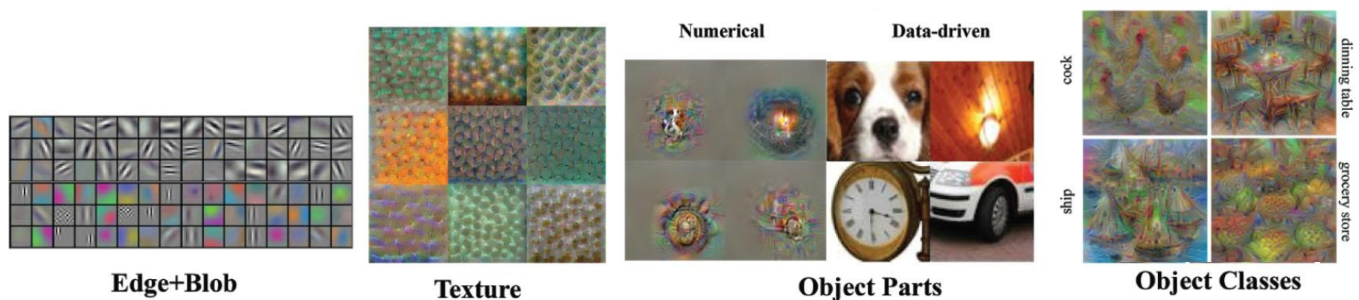

## Строительные блоки современных CNN

### Pooling

**Современные** `CNN` строятся из ограниченного набора типовых операций. Одним из важных элементов является **пулинг** $(pooling)$. Пулинг выполняет уменьшение пространственного разрешения признаковых карт. При `max-pooling` из каждого окна выбирается максимальное значение, а при `average-pooling` — среднее.

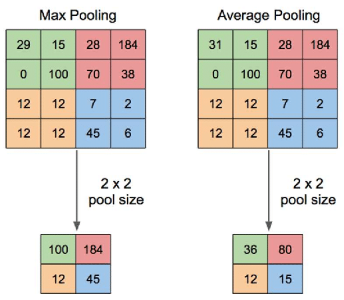

###Stride

Во многих современных архитектурах отдельный пулинг заменяется свёрткой с **шагом** ($stride$) больше единицы. Такая страйд-свёртка одновременно извлекает признаки и уменьшает пространственные размеры.

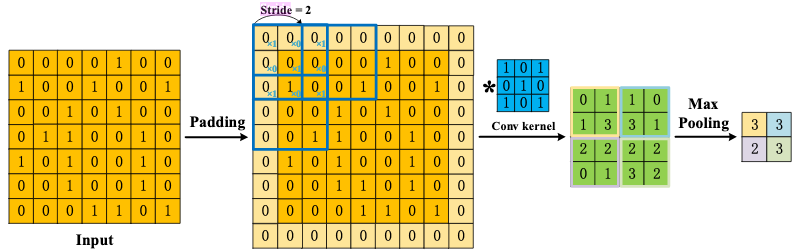

###Dilation

**Дилатация** $(dilation)$ — это операция, позволяющая увеличивать поле восприятия свёрточного ядра без увеличения его размера. Дилатация добавляет промежутки между элементами ядра, что позволяет модели захватывать широкие контексты, не увеличивая количество параметров.

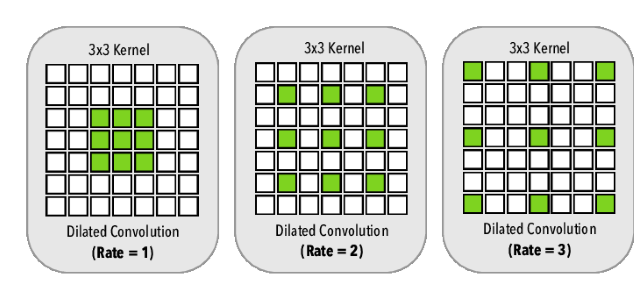

### Global Average Pooling

На более поздних этапах сети часто используется `global average pooling` ($GAP$). В этом случае для каждого канала выполняется усреднение по всем пространственным координатам. В результате получается вектор признаков, длина которого равна числу каналов.

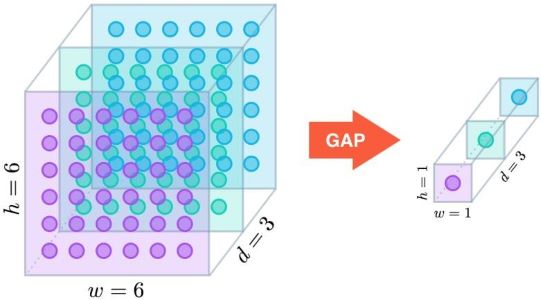

###Residual connections

Для обучения очень глубоких сетей широко применяются **резидуальные связи** $(residual\ connections)$. Суть этого приёма заключается в том, что вход слоя напрямую добавляется к его выходу. Вместо того чтобы аппроксимировать полное преобразование, слой учится корректировать вход.

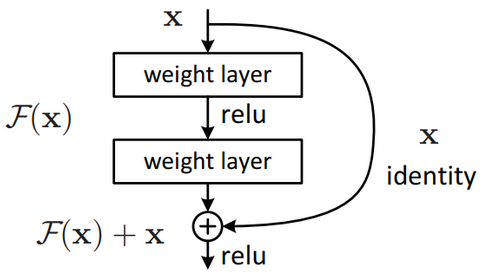

## Основные датасеты для обучения CNN

Для разработки и сравнения моделей в компьютерном зрении используются несколько эталонных **датасетов**.

###MNIST

Простейший **`MNIST`** для рукописных цифр был создан в 1998 году из наборов рукописных цифр, собранных из различных источников, включая почтовые отправления. Этот датасет состоит из 60,000 тренировочных и 10,000 тестовых изображений.

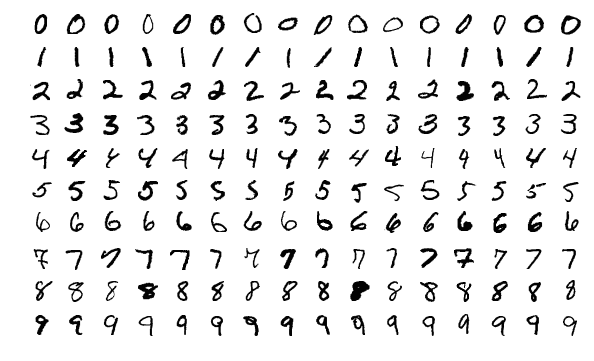

### CIFAR-10/100

**`CIFAR-10`** и **`CIFAR-100`** — это два датасета, содержащие цветные изображения размером `32×32` пикселя. `CIFAR-10` включает 60,000 изображений, разделённых на 10 классов, таких как самолёты, автомобили, птицы и собаки, с по 6,000 изображений на каждый класс. `CIFAR-100`, в свою очередь, состоит также из 60,000 изображений, но делится на 100 классов с по 600 изображений в каждом.

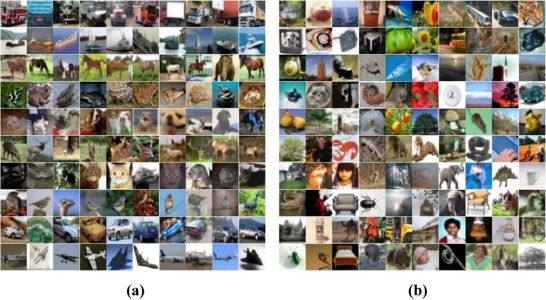

###ImageNet

**`ImageNet`** — это обширный датасет, содержащий более 14 миллионов изображений `224x224x3`, которые размечены по более чем 20,000 категорий. Использовался в ходе соревнования `ImageNet Large Scale Visual Recognition Challenge` (ILSVRC), который начался в 2010 году.

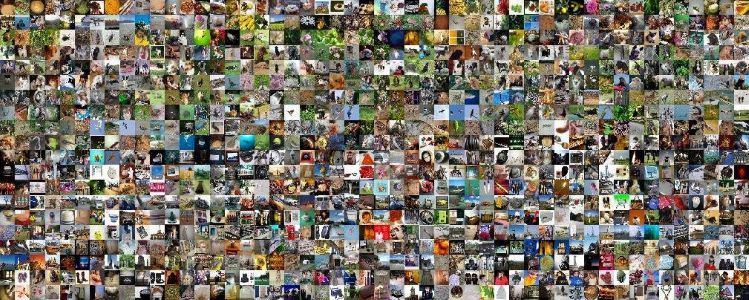

### JFT-300M

**`JFT-300M`** — это крупный **внутренний** датасет `Google`, содержащий около 300 миллионов изображений, размеченных по более чем 18,000 категорий. Используется для обучения современных моделей, используемых в продакшене.

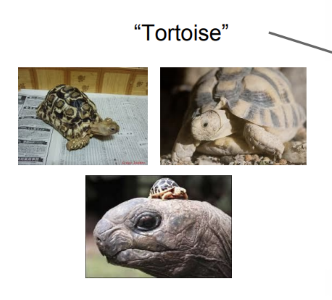

##Увеличение количества данных. Аугментация

При обучении свёрточных нейронных сетей под собственные задачи можно столкнуться с нехваткой изображений в **обучающей выборке**. Однако эту проблему можно решить путём раздутия датасета с использованием разнообразных преобразований, то есть **аугментацией данных** ($data\ augmentation$). Каждое аугментированное изображение воспринимается моделью как новое.

К доступным изображениям можно применить операции поворота, вырезания отдельной области, наложения шума или размытия, изменения цвета, яркости или контраста, растяжения в заданном направлении и т. д. К **выбору аугментаций** для решения конкретной задачи стоит подходить с умом, так как некоторые из них приводят к нефизичному результату.

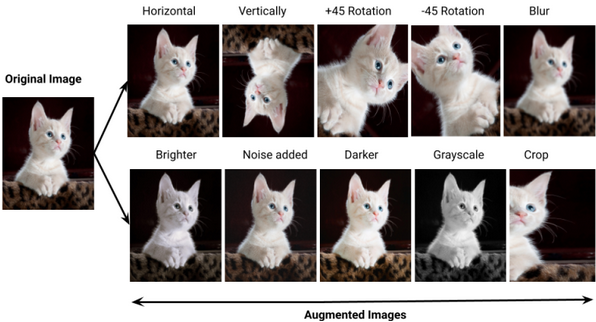

В примере выше приведён **котёнок**, сидящий на потолке, что нереализуемо. Аналогично, если обрабатываются изображения, для различения которых существенен учёт цвета, например фотографии бабочек в задаче классификации, не стоит аугментировать по цвету. И так далее.

##Архитектуры нейронных сетей

### LeNet

Первая действительно работоспособная свёрточная сеть была создана учёным **Яном Лекуном** в 1988 году. Обучалась и тестировалась на датасете **MNIST**.

Нейросеть показала, что поочерёдное применение локальных свёрток `5x5` и понижающего пулинга позволяет компактно и стабильно извлекать информативные фичи из изображений, а саму свёрточную модель можно обучать градиентными методами.

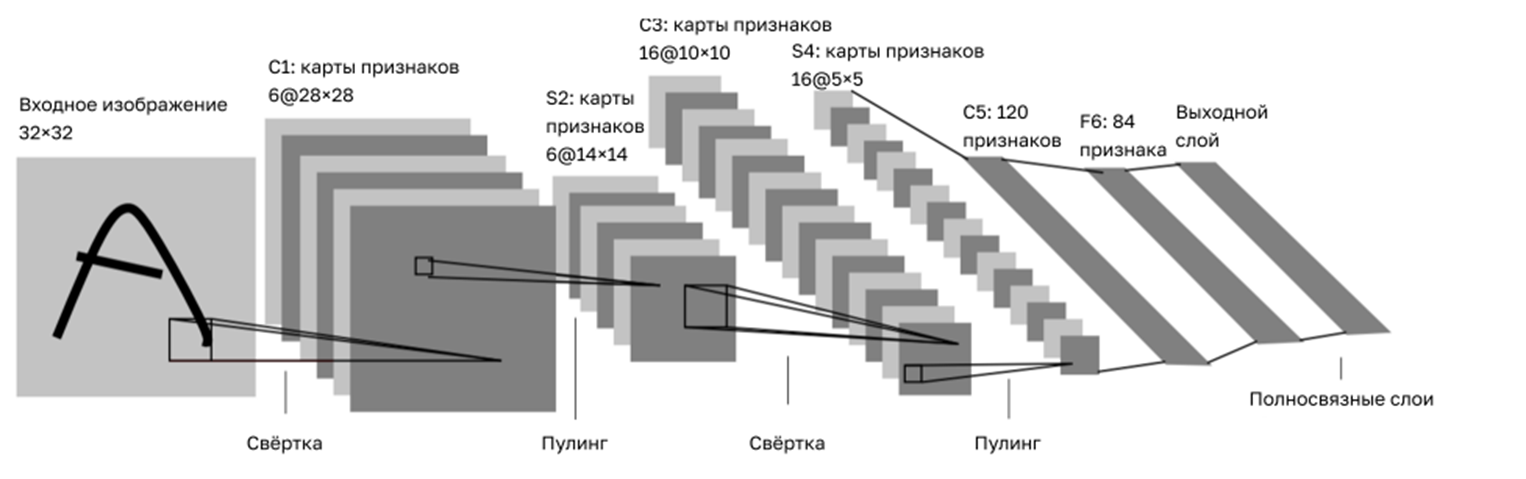

**Выходы** этой и других `CNN` передаются в **полносвязную голову** $(backbone)$ для последующей регрессии или классификации.

### AlexNet

Архитектура **`AlexNet`**, предложена **Алексом Крижевским, Ильёй Суцкевером и Джеффри Хинтоном** в 2012 году. Оригинальная научная статья до сих пор является одной из самых цитируемый в мире, насчитывая около 190,000 цитирований.

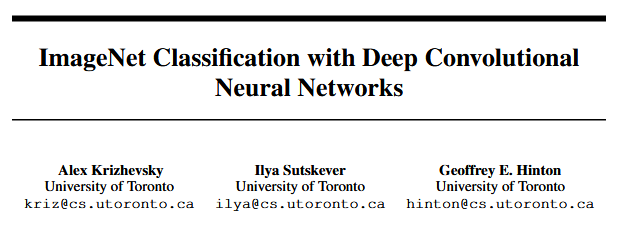

`AlexNet` продемонстрировала, что увеличение глубины и использование простой нелинейности `ReLU` вместе с обучением на `GPU` и `max-pooling` даёт большой рывок в качестве на `ImageNet`.

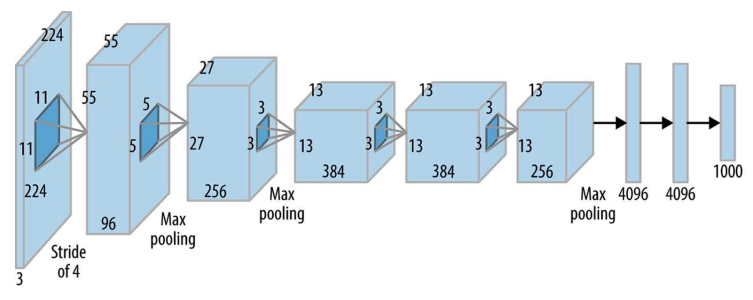

###VGG

Архитектура **`VGG`**, предложенная **К. Симоняном и А. Зиссерманом** в 2014 году, показала, что большие рецептивные поля можно строить не за счёт крупных фильтров, а последовательно стэкуя множество узких свёрток `3×3`.

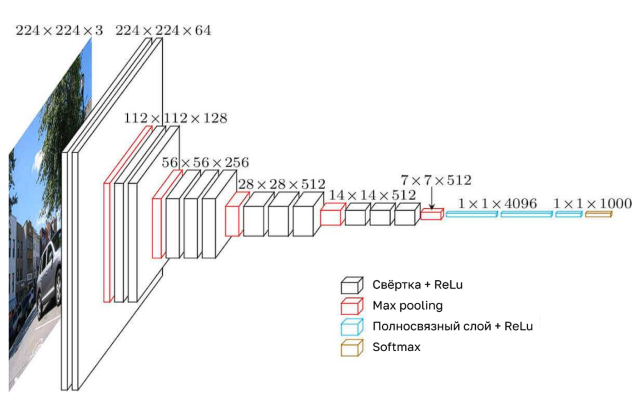

Такой единообразный блоковый дизайн упростил анализ архитектуры и позволил повысить качество за счёт увеличения глубины при контролируемом числе **параметров**. В примере ниже свёртка `5x5` экзвивалентна двум последовательным `3x3`. Однако большая свёртка требует обучать $5 \cdot 5 + 1 = 26$ параметров с учётом сдвига, тогда как две маленькие $2 \cdot (3 \cdot 3 + 1) = 20$, что на пятую часть меньше и существенно при разработке глубокой модели.

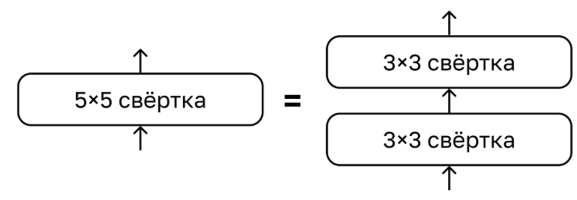

###Inception (GoogLeNet)

Идея **`Inception`**, изложенная в 2014 году и реализованная в модели `GoogLeNet`, состоит в одновременном извлечении признаков разного масштаба в параллельных ветвях и в использовании свёрток `1x1` для уменьшения числа каналов перед тяжёлыми операциями.

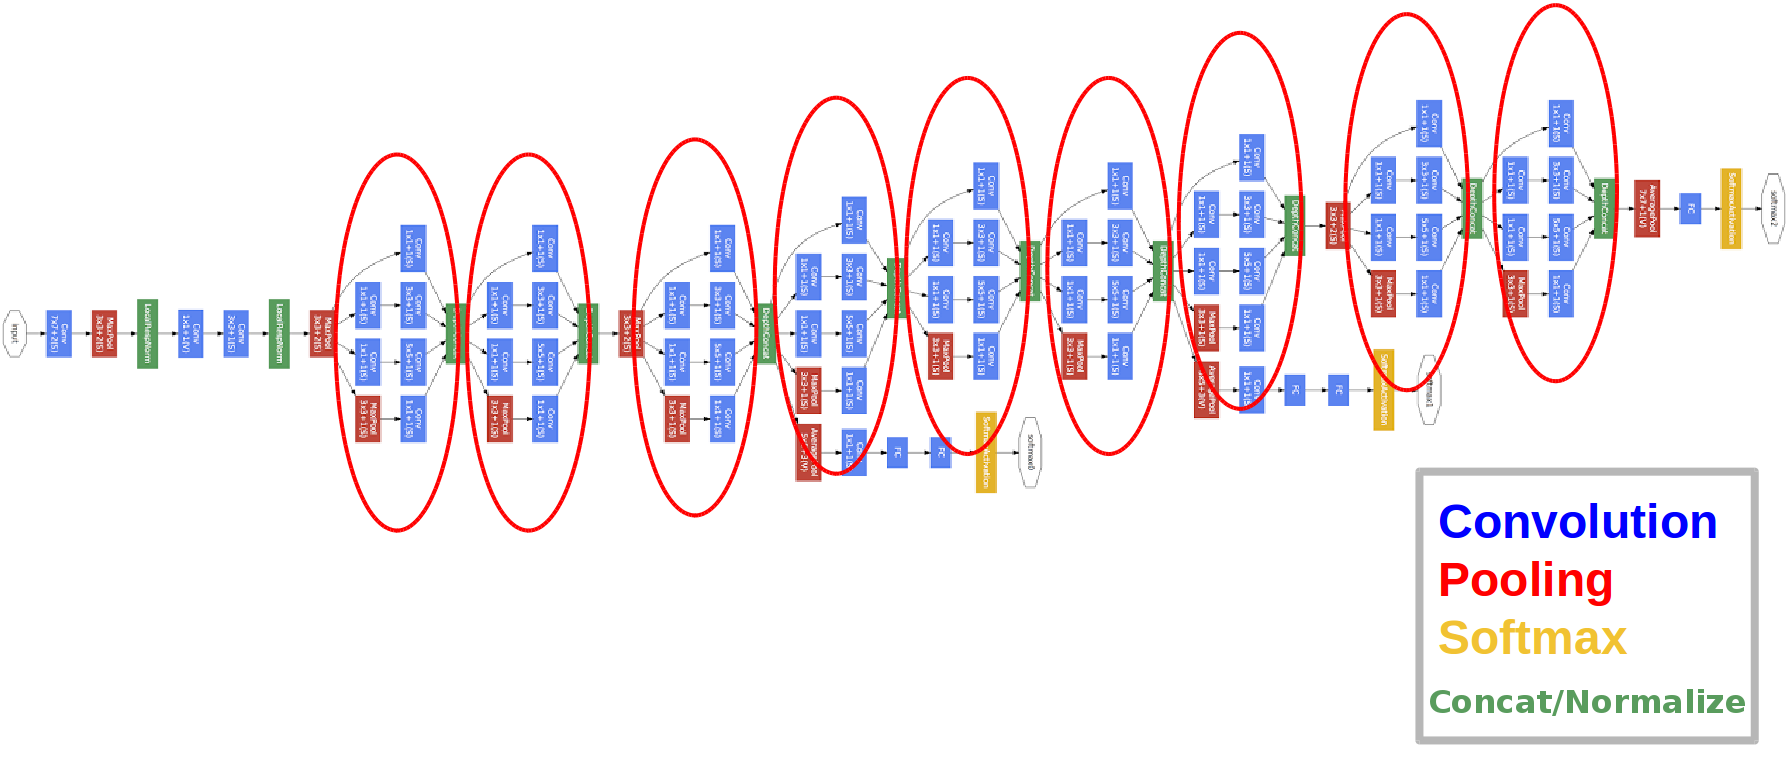

Таким образом, мы создаём **нейроны** для отдельных фич. Этот подход даёт высокую выразительность при разумных вычислительных затратах и гибко сочетает локальные и более глобальные фильтры.

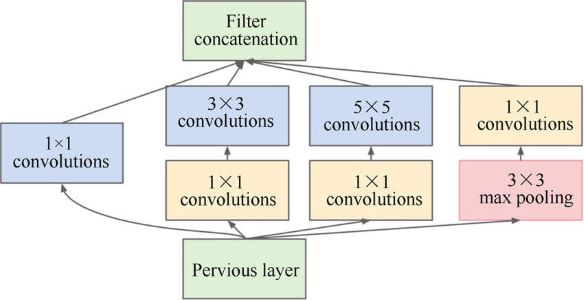

###ResNet

Архитектура **`ResNet`**, предложенная **He** и коллегами в 2015 году, ввела резидуальные связи, при которых блок учится предсказывать поправку к входу, а не полное преобразование. Это простое изменение резко упростило оптимизацию и сделало возможным надёжное обучение очень глубоких сетей, насчитывающих сотни слоёв.

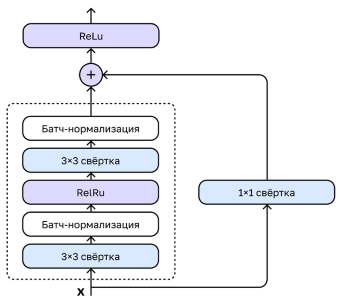

Имеется несколько **версий** модели, различающихся по количеству параметров и ожидаемой точности результата. Ниже приведено тестироваание модели в неклассической задаче детекции вредоносного кода. Байты `EXE`-файлов с вредоносным кодом были конвертированы в изображения, которые подавались в разные спецификации `ResNet`. Нейросеть показала высокие результаты.

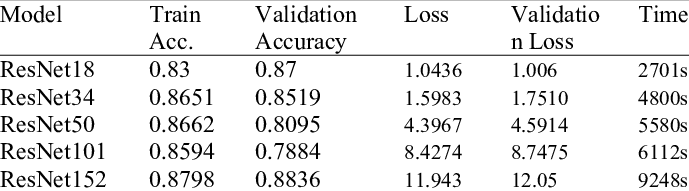

###MobileNet

Модель **`MobileNet`**, представленная в 2017 году,  использует **глубокие раздельные свёртки** $(depthwise\ separable\ convolutions$), которые разделяют процесс фильтрации изображения на два этапа. Существуют вторая и третья, более продвинутые версии модели.

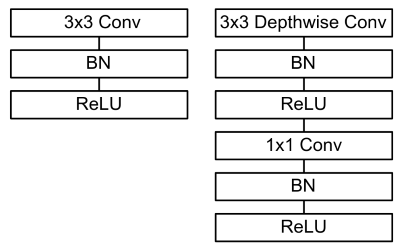

На первом этапе `MobileNetV1` применяется свертка, которая обрабатывает каждый канал входного изображения отдельно $(depthwise\ convolution)$, а на втором — используется свертка `1x1` для смешивания информации между каналами $(pointwise\ convolution)$. Это позволяет значительно сократить количество параметров и вычислительных затрат по сравнению с традиционными свёртками для запуска модели на **мобильных устройствах**.

## EfficientNet

**`EfficientNet`**, разработанная в 2019 году, предложила систематическое масштабирование архитектуры по **трём осям**: глубине, ширине и разрешению.

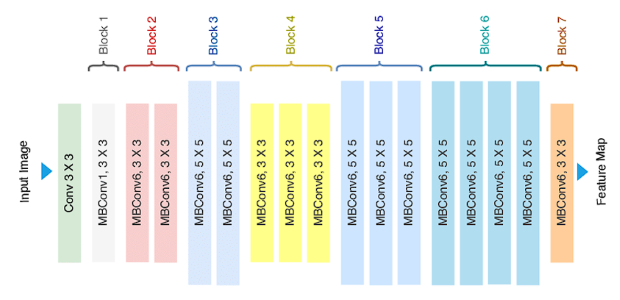

`EfficientNet` использует концепцию комплексного масштабирования. Это означает, что авторами архитектуры получены разные модели, причём от одной к другой одновременно изменяются параметры ширины, глубины и разрешения. Это помогает добиться наилучшего соотношения между производительностью и эффективностью.

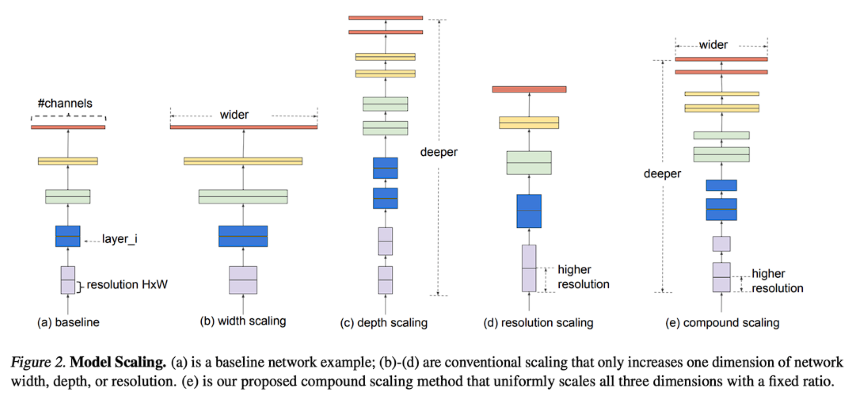

Приведём таблицу, где видна разница между количеством параметров в разных версиях `EfficientNet`.

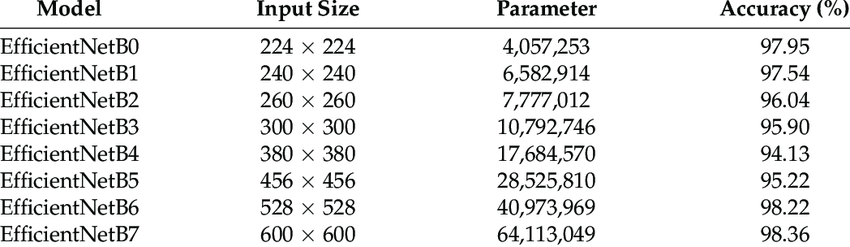

##Трансферное обучение и fine-tuning

В практических задачах, где данных мало, следует использовать предобученные модели, описанные выше. Сначала модель вроде `ResNet` или `EfficientNet` обучают на большом наборе, как ImageNet, затем адаптируют к новой задаче.

Обучение лишь полносвязной головы называют **трансферным обучением**, то есть переносом возможностей модели на решение новой задачи. Более ресурсоёмким является метод **тонкой настроки** $(fine-tuning)$, при котором с низким $lr$ дообучают веса внутренней части `CNN`.

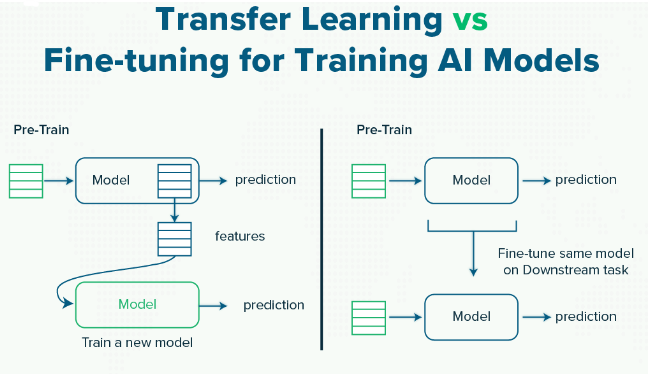

## Пример. Классификация изображений на 10 классов

###Постановка задачи

Решим задачу классификации на 10 классов для компактного поднабора `ImageNet` под названием `Imagenette` с использованием предобученной `ResNet18`. Реализуем трансферное обучение, то есть обучение лишь полносвязных слоёв сети.

###Сбор данных и исследование

Импортируем основные библиотеки и скачаем данные. `Imagenette` имеет структуру папок `train` и `val`.

In [1]:
import os
import urllib.request
import tarfile
from pathlib import Path
import torch
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from torch import nn, optim

DATA_DIR = Path("imagenette2-160")
URL = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz"
if not DATA_DIR.exists():
    fname = "imagenette2-160.tgz"
    urllib.request.urlretrieve(URL, fname)
    with tarfile.open(fname, "r:gz") as tar:
        tar.extractall()
    os.remove(fname)

/tmp/ipython-input-4228036712.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Зафиксируем случайность, выведем несколько примеров изображений из обучающей выборки.

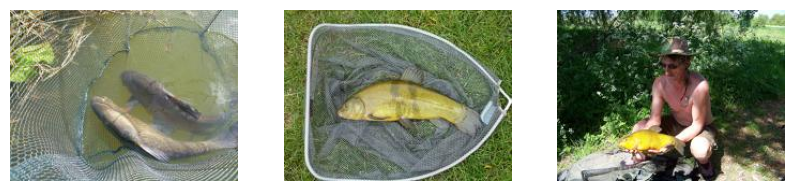

In [4]:
import matplotlib.pyplot as plt
from PIL import Image


torch.manual_seed(42)
image_paths = [
    "/content/imagenette2-160/train/n01440764/ILSVRC2012_val_00000293.JPEG",
    "/content/imagenette2-160/train/n01440764/ILSVRC2012_val_00007197.JPEG",
    "/content/imagenette2-160/train/n01440764/ILSVRC2012_val_00018317.JPEG"
]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, img_path in zip(axes, image_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

Посмотрим на распределение данных по классам. Подсчитаем изображения.

In [10]:
train_data = datasets.ImageFolder(DATA_DIR / "train")
val_data = datasets.ImageFolder(DATA_DIR / "val")

train_counts = [0] * len(train_data.classes)
val_counts = [0] * len(val_data.classes)

for _, label in train_data:
    train_counts[label] += 1
for _, label in val_data:
    val_counts[label] += 1

x_labels = train_data.classes
x = range(len(x_labels))

Построим попарную гистограмму.

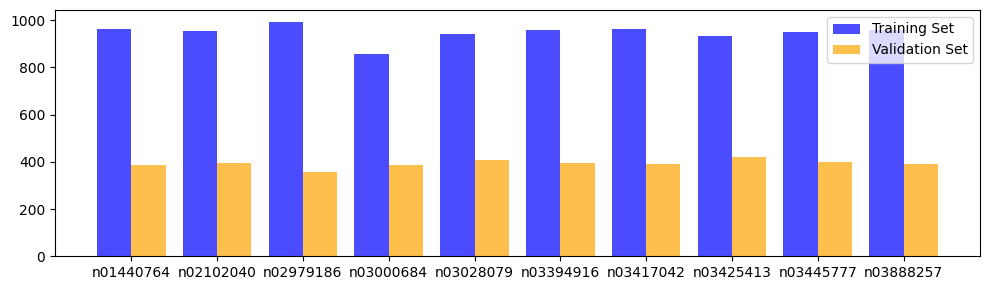

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(x, train_counts, width=0.4, color='blue', alpha=0.7, label='Training Set', align='center')
ax.bar([p + 0.4 for p in x], val_counts, width=0.4, color='orange', alpha=0.7, label='Validation Set', align='center')

ax.set_xticks([p + 0.2 for p in x])
ax.set_xticklabels(x_labels)
ax.legend(loc='best')
plt.tight_layout()
plt.show()

###Подготовка данных

В следующем фрагменте мы выбираем устройство вычислений, определяем наборы преобразований для обучения и валидации, создаём объекты `ImageFolder` и `DataLoader`. Параметры аугментаций заданы через `torchvision.transforms`. Параметр `num_workers` в `DataLoader` отвечает за количество потоков чтения данных.

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_tf = transforms.Compose([
    transforms.RandomResizedCrop(160), #обрезание до 160x160
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor() #нормировка в[0, 1]
])

val_tf = transforms.Compose([
    transforms.Resize(180), #сжатие до 180 пикселей по меньшей стороне
    transforms.CenterCrop(160),
    transforms.ToTensor()
])

train_ds = datasets.ImageFolder(DATA_DIR / "train", transform=train_tf)
val_ds = datasets.ImageFolder(DATA_DIR / "val", transform=val_tf)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=False, num_workers=2)

###Моделирование

Загружаем `ResNet18` с предобученными весами. Заменяем последний полносвязный слой на слой с 10 выходами, соответствующими числу классов в `Imagenette`. В качестве функции потерь используется `CrossEntropyLoss`. Оптимизатор `Adam`.

In [13]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 221MB/s]


Цикл обучения выполняет несколько эпох. На каждой эпохе модель переводится в режим обучения, прогоняются батчи, считается `loss`, вычисляются градиенты и выполняется шаг оптимизатора. Затем модель переводится в режим оценки и измеряется точность на валидации.

In [14]:
from tqdm.auto import tqdm

for epoch in tqdm(range(1, 6)):
    model.train()
    total = correct = 0

    for xb, yb in train_loader:
        optimizer.zero_grad()

        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

        preds = out.argmax(dim=1)
        total += yb.size(0)
        correct += (preds == yb).sum().item()
    train_acc = correct / total

    model.eval()
    total = correct = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            preds = out.argmax(dim=1)
            total += yb.size(0)
            correct += (preds == yb).sum().item()
    val_acc = correct / total

    print(f"Epoch {epoch}: train_acc={train_acc:.3f}, val_acc={val_acc:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1: train_acc=0.740, val_acc=0.666
Epoch 2: train_acc=0.793, val_acc=0.839
Epoch 3: train_acc=0.799, val_acc=0.878
Epoch 4: train_acc=0.818, val_acc=0.850
Epoch 5: train_acc=0.834, val_acc=0.842


###Оценка результата

Получили точность более 83% на тренировочных и 84% валидационных данных только за счёт заменения последнего слоя модели и обучения в течение 2 минут. Построим матрицу ошибок, чтобы оценить, какие классы модель ошибочно путает между собой.

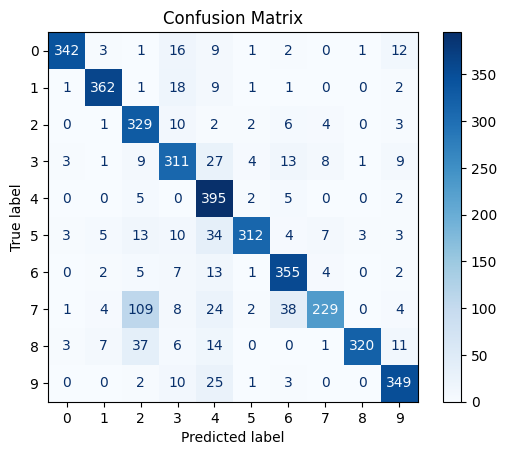

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for xb, yb in val_loader:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        preds = out.argmax(dim=1)

        y_true.extend(yb.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


##Выводы

В ходе занятия мы:

1. Познакомились с глубоким обучением.
2. Рассмотрели свёртки как подход к обработке изображений.
3. Изучили основные подходы, используемые в современных `CNN`.
4. Привели основные датасеты для обучения `CNN` и агментации, применяемые к изображениям.
5. Описали ключевые архитектуры `CNN`, концепцию трансферного обучения и файн тюнинга.
6. Решили задачу классификации изображений на 10 классов с использованием большой предобученной модели.

##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
2. Иванов, Г. Свёрточные нейросети. – Текст : электронный / Григорий Иванов ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/svyortochnye-nejroseti (дата обращения: 01.11.2025).
3. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.

